In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

exp = 'result.txt'
with open(exp) as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)
#df['lipton-excess'] = (df['lipton'] - df['bayes_error']).astype('float32') 
#df['oracle-excess'] = (df['oracle'] - df['bayes_error']).astype('float32') 
df.dtypes

nodes             int64
epochs            int64
train-mse       float64
majority-mse    float64
minority-mse    float64
dtype: object

In [2]:
measure = ['train-mse', 'majority-mse', 'minority-mse']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std', 'count']
result = df.groupby(['nodes', 'epochs'], as_index=False).agg(agg_dict)
result

nodes epochs train-mse                 majority-mse                  \
                       mean       std count         mean       std count   
0        1     20  0.967016  0.123992  1000     0.981009  0.104128  1000   
1        1     40  0.937388  0.129633  1000     0.949820  0.106647  1000   
2        1    100  0.927977  0.133020  1000     0.943874  0.106110  1000   
3        1    500  0.932845  0.126972  1000     0.946493  0.100635  1000   
4        1   1000  0.928230  0.135412  1000     0.943561  0.109444  1000   
..     ...    ...       ...       ...   ...          ...       ...   ...   
97   65536     40  0.033637  0.006783  1000     0.028157  0.005617  1000   
98   65536    100  0.026323  0.005760  1000     0.018667  0.002180  1000   
99   65536    500  0.021293  0.004451  1000     0.021959  0.003556  1000   
100  65536   1000  0.019287  0.003979  1000     0.024229  0.004362  1000   
101  65536   2000  0.017032  0.003463  1000     0.025813  0.004878  1000   

    minority-mse                  
            mean       std count  
0       1.001121  0.107224  1000  
1       0.978297  0.105214  1000  
2       0.973097  0.113337  1000  
3       0.973225  0.108458  1000  
4       0.973814  0.110765  1000  
..           ...       ...   ...  
97      0.358674  0.026475  1000  
98      0.373377  0.023444  1000  
99      0.380588  0.023555  1000  
100     0.383629  0.023776  1000  
101     0.385618  0.023992  1000  

[102 rows x 11 columns]

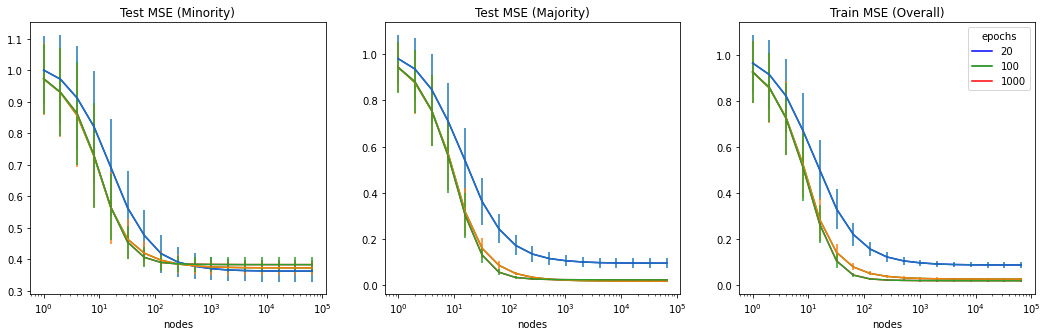

In [10]:
epochs_list = [20, 100, 1000]#np.unique(df['epochs'])
color_list = 'bgr'#'bgrcyk'

fig, ax = plt.subplots(1, 3, figsize = (18, 5), sharex=True)
for epochs, color in zip(epochs_list, color_list):
    result1 = result.loc[result['epochs']==epochs]
    nodes, mean, std, count = result1['nodes'], result1['minority-mse']['mean'], result1['minority-mse']['std'],\
     result1['minority-mse']['count']
    ax[0].plot(nodes, mean, color)
    ax[0].errorbar(nodes, mean, std)
    #ax[0].set_yscale('log')
    ax[0].set_xscale('log')
    ax[0].set_title('Test MSE (Minority)')
    ax[0].set_xlabel('nodes')


    mean, std, count = result1['majority-mse']['mean'], result1['majority-mse']['std'], result1['majority-mse']['count']
    ax[1].plot(nodes, mean, color)
    ax[1].errorbar(nodes, mean, std)
    #ax[0].set_yscale('log')
    ax[1].set_xscale('log')
    ax[1].set_title('Test MSE (Majority)')
    ax[1].set_xlabel('nodes')

    mean, std, count = result1['train-mse']['mean'], result1['train-mse']['std'], result1['train-mse']['count']
    ax[2].plot(nodes, mean, color)
    ax[2].errorbar(nodes, mean, std)
    #ax[0].set_yscale('log')
    ax[2].set_xscale('log')
    ax[2].set_title('Train MSE (Overall)')
    ax[2].set_xlabel('nodes')


plt.legend(epochs_list, title='epochs')
plt.savefig('fig1.pdf')

In [35]:
epochs_list = np.unique(df['epochs'])
color_list=['red', 'green', 'blue', 'black', 'purple', 'yellow']

from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows = 1, cols=3, subplot_titles=['Test MSE (minority)', 'Test MSE (majority)', 'Train MSE (overall)'])
for epochs, color in zip(epochs_list, color_list):
    marker = dict(line = dict(color = color))
    result1 = result.loc[result['epochs']==epochs]
    nodes, mean, std, count = result1['nodes'], result1['minority-mse']['mean'], result1['minority-mse']['std'],\
     result1['minority-mse']['count']

    fig.append_trace(go.Scatter(x = nodes, y = mean, marker = marker, error_y = {'type':'data', 'array': std, 'color': color}, name = str(epochs),\
         legendgroup = str(epochs), showlegend = False), row = 1, col = 1)

    mean, std, count = result1['majority-mse']['mean'], result1['majority-mse']['std'], result1['majority-mse']['count']
    fig.append_trace(go.Scatter(x = nodes, y = mean, marker = marker, error_y = {'type':'data', 'array': std, 'color': color}, name = str(epochs),\
        legendgroup = str(epochs), showlegend = False), row = 1, col = 2)

    mean, std, count = result1['train-mse']['mean'], result1['train-mse']['std'], result1['train-mse']['count']
    fig.append_trace(go.Scatter(x = nodes, y = mean, error_y = {'type':'data', 'array': std, 'color': color}, name = str(epochs),\
        legendgroup = str(epochs), showlegend = True), row = 1, col = 3)


fig.update_xaxes(type = 'log')

fig.show()